In [1]:
from utils import get_fichero, read_file, generar_permutador, funcion_f, tiempo_final_f
import seleccion, cruces, genetico
import matplotlib.pyplot as plt
import cruces

In [2]:
NIND = 20
NGEN = 100
NFILE = 8
MUPB = 0.1
CXPB = 0.5

file = get_fichero(NFILE)
d = read_file(file)

In [3]:
# INICIO
individuos = []
fitness = []

for i in range(NIND):
    permutador = generar_permutador(d)
    individuos.append(permutador)
    fitness.append(tiempo_final_f(funcion_f(permutador,d)))
    
for i in individuos[0:3]:
    print("- ", i)
print("...")
for i in individuos[-4:-1]:
    print("- ", i)

-  [29, 47, 66, 36, 45, 52, 63, 94, 44, 83, 34, 27, 39, 53, 13, 65, 16, 84, 18, 92, 78, 59, 14, 30, 23, 6, 38, 17, 4, 90, 73, 42, 95, 51, 62, 21, 89, 72, 43, 56, 86, 8, 48, 96, 58, 97, 60, 19, 22, 26, 98, 37, 31, 49, 69, 10, 80, 85, 87, 15, 57, 50, 70, 1, 71, 32, 28, 5, 54, 93, 75, 61, 68, 25, 91, 24, 9, 88, 33, 3, 0, 99, 35, 2, 40, 12, 82, 55, 46, 64, 77, 7, 76, 20, 11, 41, 79, 67, 74, 81]
-  [49, 96, 13, 63, 1, 39, 94, 55, 16, 80, 26, 85, 22, 88, 27, 35, 54, 9, 99, 83, 73, 65, 72, 17, 38, 20, 48, 89, 87, 74, 86, 66, 59, 46, 21, 31, 6, 61, 19, 32, 97, 12, 34, 37, 15, 45, 91, 69, 95, 67, 11, 28, 10, 40, 23, 79, 41, 25, 71, 36, 70, 50, 77, 18, 98, 76, 4, 93, 62, 92, 47, 29, 90, 33, 60, 43, 56, 0, 53, 64, 81, 7, 5, 52, 51, 75, 82, 2, 78, 58, 30, 84, 24, 42, 3, 44, 14, 8, 68, 57]
-  [12, 17, 4, 30, 57, 56, 27, 11, 46, 95, 67, 41, 92, 89, 38, 64, 88, 86, 99, 35, 72, 0, 68, 23, 63, 32, 2, 50, 52, 47, 97, 91, 40, 74, 44, 54, 60, 10, 31, 69, 43, 13, 19, 98, 48, 96, 33, 80, 34, 59, 24, 29, 65,

636

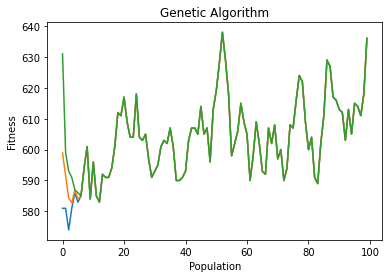

In [4]:
'''
GENETICO
'''

tiempo_final_f(funcion_f(genetico.genetic(d, plot=True), d))
